In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
results  = pd.read_csv('data/results.csv', usecols = [1,2,5,8,9])
races = pd.read_csv('data/races.csv', usecols = [0,1,3])
drivers = pd.read_csv('data/driver.csv', usecols = [0,1])
points = [25,18,15,12,10,8,6,4,2,1,0,0,0,0,0,0,0,0,0,0]
points_2008 = [10, 8, 6, 5, 4, 3, 2, 1,0,0,0,0,0,0,0,0,0,0,0,0]
place = np.arange(1,22,1)
results['grid'].replace(to_replace=(0,21,22,23,24), value = 20, inplace = True)

In [12]:
dict_year = dict(zip(races.values[:,0], races.values[:,1]))
dict_drivers = dict(zip(drivers.values[:,0], drivers.values[:,1]))
results['raceId'] = results['raceId'].map(dict_year)
results['driverId'] = results['driverId'].map(dict_drivers)
latest = results.copy()[results['raceId'] >= 2000].drop('raceId', axis = 1).drop('driverId', axis = 1)

In [13]:
def plot(grid_position):
    exp_points = 0
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111)
    temp = latest.copy()[latest['grid'] == grid_position].values
    prob, _, _ = plt.hist(temp[:,1], bins = place, density=True, lw = 1, edgecolor = 'k', color = 'purple')
    plt.ylabel(r'Probability of finishing race at $X$ position')
    plt.xlabel('Position')
    plt.title(f'Distribution for grid position #{int(grid_position)}')
    ax.set_xticks(np.arange(len(place))+1.5)
    ax.set_xticklabels(place[0:20])
    plt.xlim(1,21)
    plt.show()

In [14]:
_ = widgets.interact(plot, grid_position = place)

interactive(children=(Dropdown(description='grid_position', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

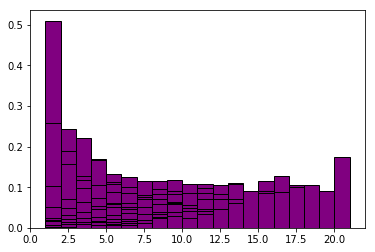

In [15]:
exp_points = list()
for pl in np.arange(1,21,1):
    temp = latest.copy()[latest['grid'] == pl].values
    prob, _, _ = plt.hist(temp[:,1], bins = place, density=True, lw = 1, edgecolor = 'k', color = 'purple')
    exp_point = 0
    for i in range(20):
        exp_point += prob[i]*points[i]
    exp_points.append(round(exp_point))
dict_expected = dict(zip(np.arange(1,21,1), exp_points))

In [16]:
def predict_points(driver_results, season):
    tmp = driver_results.copy()
    if season == True:
        tmp['grid'] = tmp['grid'].map(dict_expected)
        points = np.sum(tmp.values[:,2])
    else:
        tmp['grid'] = tmp['grid'].map(dict_expected)
        points = np.sum(tmp.values[:,2])
    return(points)

In [17]:
sea = results.copy()[(results['raceId'] == 2017)]

In [18]:
def predict_season(season):
    season_pre = list()
    season_actual = list()
    for driver in season['driverId'].unique():
        tmp = season.copy()[season['driverId'] == driver]
        season_pre.append([predict_points(tmp,True), driver])
        season_actual.append([np.sum(tmp['points'].values), driver])
    return(season_pre, season_actual)

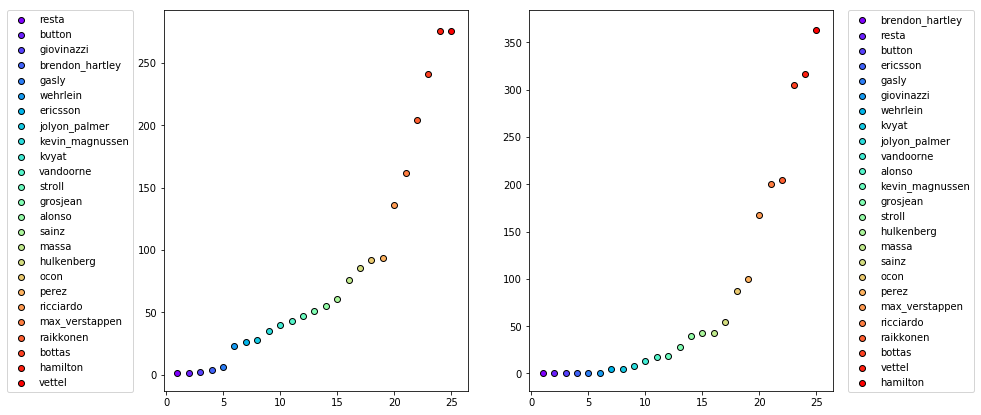

In [19]:
season_pre = pd.DataFrame(predict_season(sea)[0], columns=['points', 'driver']).sort_values(by = ['points'])
labels1 = season_pre['driver'].unique()

season_act = pd.DataFrame(predict_season(sea)[1], columns=['points', 'driver']).sort_values(by = ['points'])
labels2 = season_act['driver'].unique()

colors = plt.cm.rainbow(np.linspace(0, 1, len(labels1)))
fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(121)
for i in range(len(season_pre.values[:,0])):
    plt.scatter(np.linspace(1,25,25)[i],season_pre.values[i,0], color = colors[i], label = labels1[i],  edgecolor = 'k')
plt.legend(bbox_to_anchor=(-0.1, 1), loc=0, borderaxespad=0.)
ax = fig.add_subplot(122)
for i in range(len(season_pre.values[:,0])):
    plt.scatter(np.linspace(1,25,25)[i],season_act.values[i,0], color = colors[i], label = labels2[i],  edgecolor = 'k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [20]:
def distance(array):
    dist = list()
    colors = list()
    for i in range(len(array[:,2])):
        if array[i,1] == array[i,2]:
            dist.append(0)
            colors.append('b')
        else:
            position = int(np.where(array[:,1] == array[i,2])[0])
            dist.append(i-position)
            if(abs(i-position) == 1):
                colors.append('pink')
            elif(abs(i-position) == 2):
                colors.append('coral')
            else:
                colors.append('r')
    return(dist, colors)

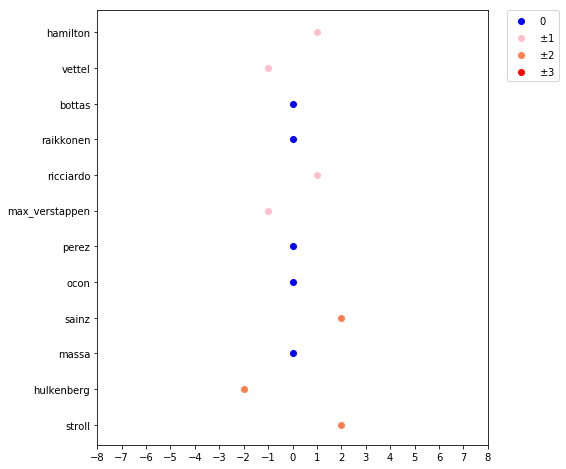

In [21]:
season_pre['actual'] = labels2
season_pos = season_pre.values
error = distance(season_pos)

fig = plt.figure(figsize = (7,8))
ax = fig.add_subplot(111)
tail = 13
for i in range(len(error[0])-tail):
    plt.scatter(error[0][i+tail],np.arange(1,len(error[0])+1,1)[i+tail], c = error[1][i+tail])
plt.legend((r'$0$',r'$\pm1$',r'$\pm2$',r'$\pm3$'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_yticks(np.arange(1+tail,len(error[0])+1,1))
ax.set_yticklabels(labels2[tail:])
ax.set_xticks(np.arange(-8,9,1))
leg = ax.get_legend()
leg.legendHandles[0].set_color('b')
leg.legendHandles[1].set_color('pink')
leg.legendHandles[2].set_color('coral')
leg.legendHandles[3].set_color('r')
plt.show()

In [22]:
china_toid = races.copy()[races['circuitId'] == 17]
china_toid.tail()

,raceId,year,circuitId
920,928,2015,17
937,950,2016,17
957,970,2017,17
978,991,2018,17
999,1012,2019,17


In [23]:
monaco_toid = races.copy()[races['circuitId'] == 6]
monaco_toid.tail()

,raceId,year,circuitId
916,931,2015,6
940,953,2016,6
961,974,2017,6
981,994,2018,6
1002,1015,2019,6


In [24]:
results  = pd.read_csv('data/results.csv', usecols = [1,2,5,8,9])
results['driverId'] = results['driverId'].map(dict_drivers)

In [25]:
frames = list()
for race in china_toid['raceId'].unique():
    frames.append(results.copy()[results['raceId'] == race])
china = pd.concat(frames).drop('raceId', axis = 1).drop('driverId', axis = 1)

In [26]:
frames = list()
for race in monaco_toid['raceId'].unique():
    frames.append(results.copy()[results['raceId'] == race])
monaco = pd.concat(frames).drop('raceId', axis = 1).drop('driverId', axis = 1)

In [27]:
china_rc = results.copy()[(results['raceId'] == 903)]
monaco_rc = results.copy()[(results['raceId'] == 974)]

In [28]:
def predict_race(race):
    race_pre = list()
    race_actual = list()
    for driver in race['driverId'].unique():
        tmp = race.copy()[race['driverId'] == driver]
        race_pre.append([predict_points(tmp,False), driver])
        race_actual.append([np.sum(tmp['points'].values), driver])
    return(race_pre, race_actual)

In [29]:
race_pre = pd.DataFrame(predict_race(china_rc)[0], columns=['points', 'driver']).sort_values(by = ['points'])
labels3 = race_pre['driver'].unique()

race_act = pd.DataFrame(predict_race(china_rc)[1], columns=['points', 'driver']).sort_values(by = ['points'])
labels4 = race_act['driver'].unique()

In [30]:
race_pre = pd.DataFrame(predict_race(monaco_rc)[0], columns=['points', 'driver']).sort_values(by = ['points'])
labels3 = race_pre['driver'].unique()

race_act = pd.DataFrame(predict_race(monaco_rc)[1], columns=['points', 'driver']).sort_values(by = ['points'])
labels4 = race_act['driver'].unique()

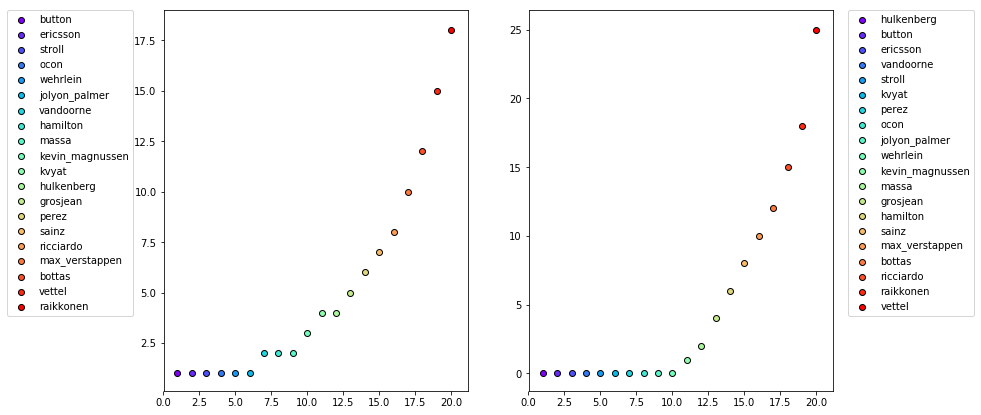

In [31]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(labels3)))
fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(121)
for i in range(len(race_pre.values[:,0])):
    plt.scatter(np.linspace(1,25,25)[i],race_pre.values[i,0], color = colors[i], label = labels3[i],  edgecolor = 'k')
plt.legend(bbox_to_anchor=(-0.1, 1), loc=0, borderaxespad=0.)
ax = fig.add_subplot(122)
for i in range(len(race_pre.values[:,0])):
    plt.scatter(np.linspace(1,25,25)[i],race_act.values[i,0], color = colors[i], label = labels4[i],  edgecolor = 'k')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

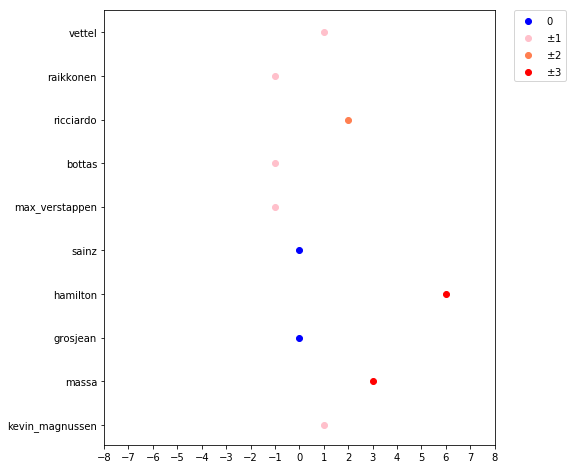

In [32]:
race_pre['actual'] = labels4
error = distance(race_pre.values)
fig = plt.figure(figsize = (7,8))
ax = fig.add_subplot(111)
tail = 10
for i in range(len(error[0])-tail):
    plt.scatter(error[0][i+tail],np.arange(1,len(error[0])+1,1)[i+tail], c = error[1][i+tail])
plt.legend((r'$0$',r'$\pm1$',r'$\pm2$',r'$\pm3$'),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_yticks(np.arange(1+tail,len(error[0])+1,1))
ax.set_yticklabels(labels4[tail:])
ax.set_xticks(np.arange(-8,9,1))
leg = ax.get_legend()
leg.legendHandles[0].set_color('b')
leg.legendHandles[1].set_color('pink')
leg.legendHandles[2].set_color('coral')
leg.legendHandles[3].set_color('r')
plt.savefig('monaco2017.png', dpi = 100)
plt.show()